# FIRST PART OF THE PROJECT
Data preparation and visualization

In [82]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

+ Data loading

The dataset has been download from Kaggle -> https://www.kaggle.com/dansbecker/nba-shot-logs

In [83]:
# load dataset
data = pd.read_csv('../DATASET/shot_logs.csv')
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


+ Data Visualization

The main information of the dataset:

In [84]:
# view dataset
num_examples, num_features = data.shape
print(f'Number of examples = {num_examples}\nNumber of features = {num_features}\n')

for i in range(0, len(data.columns)):
    print(f'Feature {data.columns.values[i]} -> {type(data.iloc[2].iloc[i])}')
print('\n')

Number of examples = 128069
Number of features = 21

Feature GAME_ID -> <class 'numpy.int64'>
Feature MATCHUP -> <class 'str'>
Feature LOCATION -> <class 'str'>
Feature W -> <class 'str'>
Feature FINAL_MARGIN -> <class 'numpy.int64'>
Feature SHOT_NUMBER -> <class 'numpy.int64'>
Feature PERIOD -> <class 'numpy.int64'>
Feature GAME_CLOCK -> <class 'str'>
Feature SHOT_CLOCK -> <class 'numpy.float64'>
Feature DRIBBLES -> <class 'numpy.int64'>
Feature TOUCH_TIME -> <class 'numpy.float64'>
Feature SHOT_DIST -> <class 'numpy.float64'>
Feature PTS_TYPE -> <class 'numpy.int64'>
Feature SHOT_RESULT -> <class 'str'>
Feature CLOSEST_DEFENDER -> <class 'str'>
Feature CLOSEST_DEFENDER_PLAYER_ID -> <class 'numpy.int64'>
Feature CLOSE_DEF_DIST -> <class 'numpy.float64'>
Feature FGM -> <class 'numpy.int64'>
Feature PTS -> <class 'numpy.int64'>
Feature player_name -> <class 'str'>
Feature player_id -> <class 'numpy.int64'>




In [85]:
# Extended view of dataset
for i in range(0, len(data.columns)):
    if type(data.iloc[2].iloc[i]) in [np.int64, np.float64]:
        print(f'Feature {data.columns.values[i]}:\n\tMean -> {np.mean(data[data.columns[i]])}\n\tStandard deviation -> {np.std(data[data.columns[i]])}\n\tMedian -> {np.median(data[data.columns[i]])}')

data.describe(include=[np.number])

Feature GAME_ID:
	Mean -> 21400451.87876067
	Standard deviation -> 257.87625180547735
	Median -> 21400449.0
Feature FINAL_MARGIN:
	Mean -> 0.2087234225300424
	Standard deviation -> 13.233215333789198
	Median -> 1.0
Feature SHOT_NUMBER:
	Mean -> 6.506898624959983
	Standard deviation -> 4.713241275150322
	Median -> 5.0
Feature PERIOD:
	Mean -> 2.4694266372033824
	Standard deviation -> 1.139914611079939
	Median -> 2.0
Feature SHOT_CLOCK:
	Mean -> 12.453343618879694
	Standard deviation -> 5.763241488386513
	Median -> nan
Feature DRIBBLES:
	Mean -> 2.023354597912063
	Standard deviation -> 3.4777469027136605
	Median -> 1.0
Feature TOUCH_TIME:
	Mean -> 2.765901193887669
	Standard deviation -> 3.043670352394686
	Median -> 1.6
Feature SHOT_DIST:
	Mean -> 13.571504423396759
	Standard deviation -> 8.88892888800322
	Median -> 13.7
Feature PTS_TYPE:
	Mean -> 2.2646698264216947
	Standard deviation -> 0.44115723886569586
	Median -> 2.0
Feature CLOSEST_DEFENDER_PLAYER_ID:
	Mean -> 159038.48728419837
	

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


+ Data Cleaning

The data will be cleaned in order to have a better understanding of the dataset and to be able to use it for the analysis.

Cheking for columns with only one value:

In [86]:
# check for useless features
data.nunique()

GAME_ID                        904
MATCHUP                       1808
LOCATION                         2
W                                2
FINAL_MARGIN                    88
SHOT_NUMBER                     38
PERIOD                           7
GAME_CLOCK                     719
SHOT_CLOCK                     241
DRIBBLES                        33
TOUCH_TIME                     313
SHOT_DIST                      448
PTS_TYPE                         2
SHOT_RESULT                      2
CLOSEST_DEFENDER               473
CLOSEST_DEFENDER_PLAYER_ID     474
CLOSE_DEF_DIST                 299
FGM                              2
PTS                              3
player_name                    281
player_id                      281
dtype: int64

Cheking for columns with null values:

In [87]:
# check for missing values
data.isna().sum()

GAME_ID                          0
MATCHUP                          0
LOCATION                         0
W                                0
FINAL_MARGIN                     0
SHOT_NUMBER                      0
PERIOD                           0
GAME_CLOCK                       0
SHOT_CLOCK                    5567
DRIBBLES                         0
TOUCH_TIME                       0
SHOT_DIST                        0
PTS_TYPE                         0
SHOT_RESULT                      0
CLOSEST_DEFENDER                 0
CLOSEST_DEFENDER_PLAYER_ID       0
CLOSE_DEF_DIST                   0
FGM                              0
PTS                              0
player_name                      0
player_id                        0
dtype: int64

In [88]:
# droping features with missing values
data = data.drop(['SHOT_CLOCK'], axis=1)
data.isna().sum()

GAME_ID                       0
MATCHUP                       0
LOCATION                      0
W                             0
FINAL_MARGIN                  0
SHOT_NUMBER                   0
PERIOD                        0
GAME_CLOCK                    0
DRIBBLES                      0
TOUCH_TIME                    0
SHOT_DIST                     0
PTS_TYPE                      0
SHOT_RESULT                   0
CLOSEST_DEFENDER              0
CLOSEST_DEFENDER_PLAYER_ID    0
CLOSE_DEF_DIST                0
FGM                           0
PTS                           0
player_name                   0
player_id                     0
dtype: int64

Transforming non-numeric columns to numeric:

In [89]:
# Transforming non-numerical features to numerical features
# Feature GAME_CLOCK has str type, so we need to convert it to float type.
# We will convert it to minutes.
data['GAME_CLOCK'] = data['GAME_CLOCK'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
data['GAME_CLOCK'] = data['GAME_CLOCK'] / 60

OneHotEncoder

In [90]:
### OneHotEncoder
encoder = OneHotEncoder(handle_unknown="ignore")

# LOCATION
encoder.fit(data[['LOCATION']])
# we transform the data
data_tmp = encoder.transform(data[['LOCATION']])
data_tmp = pd.DataFrame(data_tmp.toarray(), columns=encoder.get_feature_names_out(['LOCATION']))

data = pd.concat((data, data_tmp), axis=1)
data = data.drop(['LOCATION'], axis=1)

# W
encoder.fit(data[['W']])
# we transform the data
data_tmp = encoder.transform(data[['W']])
data_tmp = pd.DataFrame(data_tmp.toarray(), columns=encoder.get_feature_names_out(['W']))

data = pd.concat((data, data_tmp), axis=1)
data = data.drop(['W'], axis=1)

# SHOT_RESULT
encoder.fit(data[['SHOT_RESULT']])
# we transform the data
data_tmp = encoder.transform(data[['SHOT_RESULT']])
data_tmp = pd.DataFrame(data_tmp.toarray(), columns=encoder.get_feature_names_out(['SHOT_RESULT']))

data = pd.concat((data, data_tmp), axis=1)
data = data.drop(['SHOT_RESULT'], axis=1)

data.head()

,GAME_ID,MATCHUP,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,...,FGM,PTS,player_name,player_id,LOCATION_A,LOCATION_H,W_L,W_W,SHOT_RESULT_made,SHOT_RESULT_missed
0,21400899,"MAR 04, 2015 - CHA @ BKN",24,1,1,1.150000,2,1.9,7.7,2,...,1,2,brian roberts,203148,1.0,0.0,0.0,1.0,1.0,0.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",24,2,1,0.233333,0,0.8,28.2,3,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",24,3,1,0.000000,3,2.7,10.1,2,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",24,4,2,11.783333,2,1.9,17.2,2,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",24,5,2,10.566667,2,2.7,3.7,2,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0


LabelEncoder

In this case, Label Encoder is not possible to use because the data cant be set categorical.

+ DATA CLEANED VISUALIZATION

In [91]:
# view dataset
num_examples, num_features = data.shape
print(f'Number of examples = {num_examples}\nNumber of features = {num_features}\n')

for i in range(0, len(data.columns)):
    print(f'Feature {data.columns.values[i]} -> {type(data.iloc[2].iloc[i])}')
print('\n')

print(data.isna().sum())

data.head()

Number of examples = 128069
Number of features = 23

Feature GAME_ID -> <class 'numpy.int64'>
Feature MATCHUP -> <class 'str'>
Feature FINAL_MARGIN -> <class 'numpy.int64'>
Feature SHOT_NUMBER -> <class 'numpy.int64'>
Feature PERIOD -> <class 'numpy.int64'>
Feature GAME_CLOCK -> <class 'numpy.float64'>
Feature DRIBBLES -> <class 'numpy.int64'>
Feature TOUCH_TIME -> <class 'numpy.float64'>
Feature SHOT_DIST -> <class 'numpy.float64'>
Feature PTS_TYPE -> <class 'numpy.int64'>
Feature CLOSEST_DEFENDER -> <class 'str'>
Feature CLOSEST_DEFENDER_PLAYER_ID -> <class 'numpy.int64'>
Feature CLOSE_DEF_DIST -> <class 'numpy.float64'>
Feature FGM -> <class 'numpy.int64'>
Feature PTS -> <class 'numpy.int64'>
Feature player_name -> <class 'str'>
Feature player_id -> <class 'numpy.int64'>
Feature LOCATION_A -> <class 'numpy.float64'>
Feature LOCATION_H -> <class 'numpy.float64'>
Feature W_L -> <class 'numpy.float64'>
Feature W_W -> <class 'numpy.float64'>
Feature SHOT_RESULT_made -> <class 'numpy.flo

,GAME_ID,MATCHUP,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,...,FGM,PTS,player_name,player_id,LOCATION_A,LOCATION_H,W_L,W_W,SHOT_RESULT_made,SHOT_RESULT_missed
0,21400899,"MAR 04, 2015 - CHA @ BKN",24,1,1,1.150000,2,1.9,7.7,2,...,1,2,brian roberts,203148,1.0,0.0,0.0,1.0,1.0,0.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",24,2,1,0.233333,0,0.8,28.2,3,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",24,3,1,0.000000,3,2.7,10.1,2,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",24,4,2,11.783333,2,1.9,17.2,2,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",24,5,2,10.566667,2,2.7,3.7,2,...,0,0,brian roberts,203148,1.0,0.0,0.0,1.0,0.0,1.0


+ GRAPHICAL DATA VISUALIZATION

We are going to analyze the shot type and the shot distance

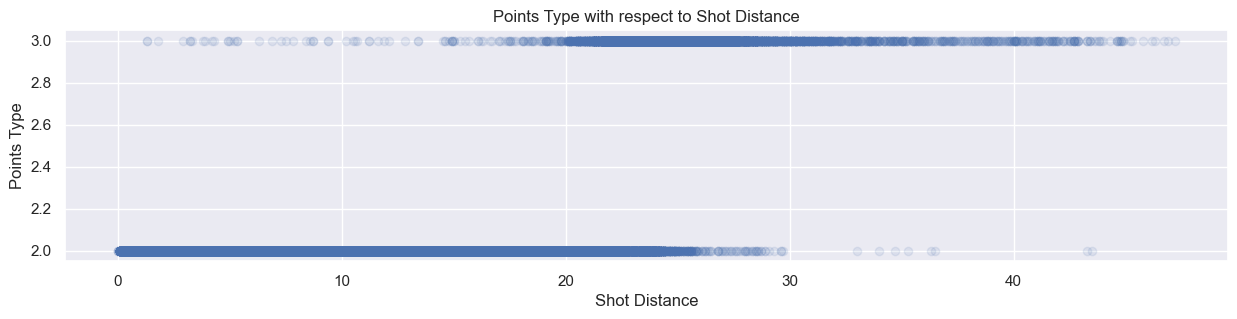

In [92]:
# we are going to plot the pts_type feature with respect to the shot distance
plt.figure(figsize=(15, 3))
plt.scatter(data.SHOT_DIST, data.PTS_TYPE, alpha=0.1)
plt.xlabel('Shot Distance')
plt.ylabel('Points Type')
plt.title('Points Type with respect to Shot Distance')
plt.show()

We can see that there are shots from 0 to 23,7 that are 3 points shots, this can be an outlier but the player can jump from the 3 point line and get closer to the basket. As we can see there are few shots of this type.
In the other hand, we can see outliers in the 2 point shots, there are shots from 23,7 to 47,5 feet, this is not possible, the player can jump from the 2 point line and get further from the basket but it is realy weird to see this kind of shots. Then we are going to remove this outliers.

- Removing outliers

In [93]:
# removing 2 points shots further than 30 feet
data = data.drop(data[(data['PTS_TYPE'] == 2) & (data['SHOT_DIST'] > 30)].index)

We are going to analyze the shot distance and the shot clock

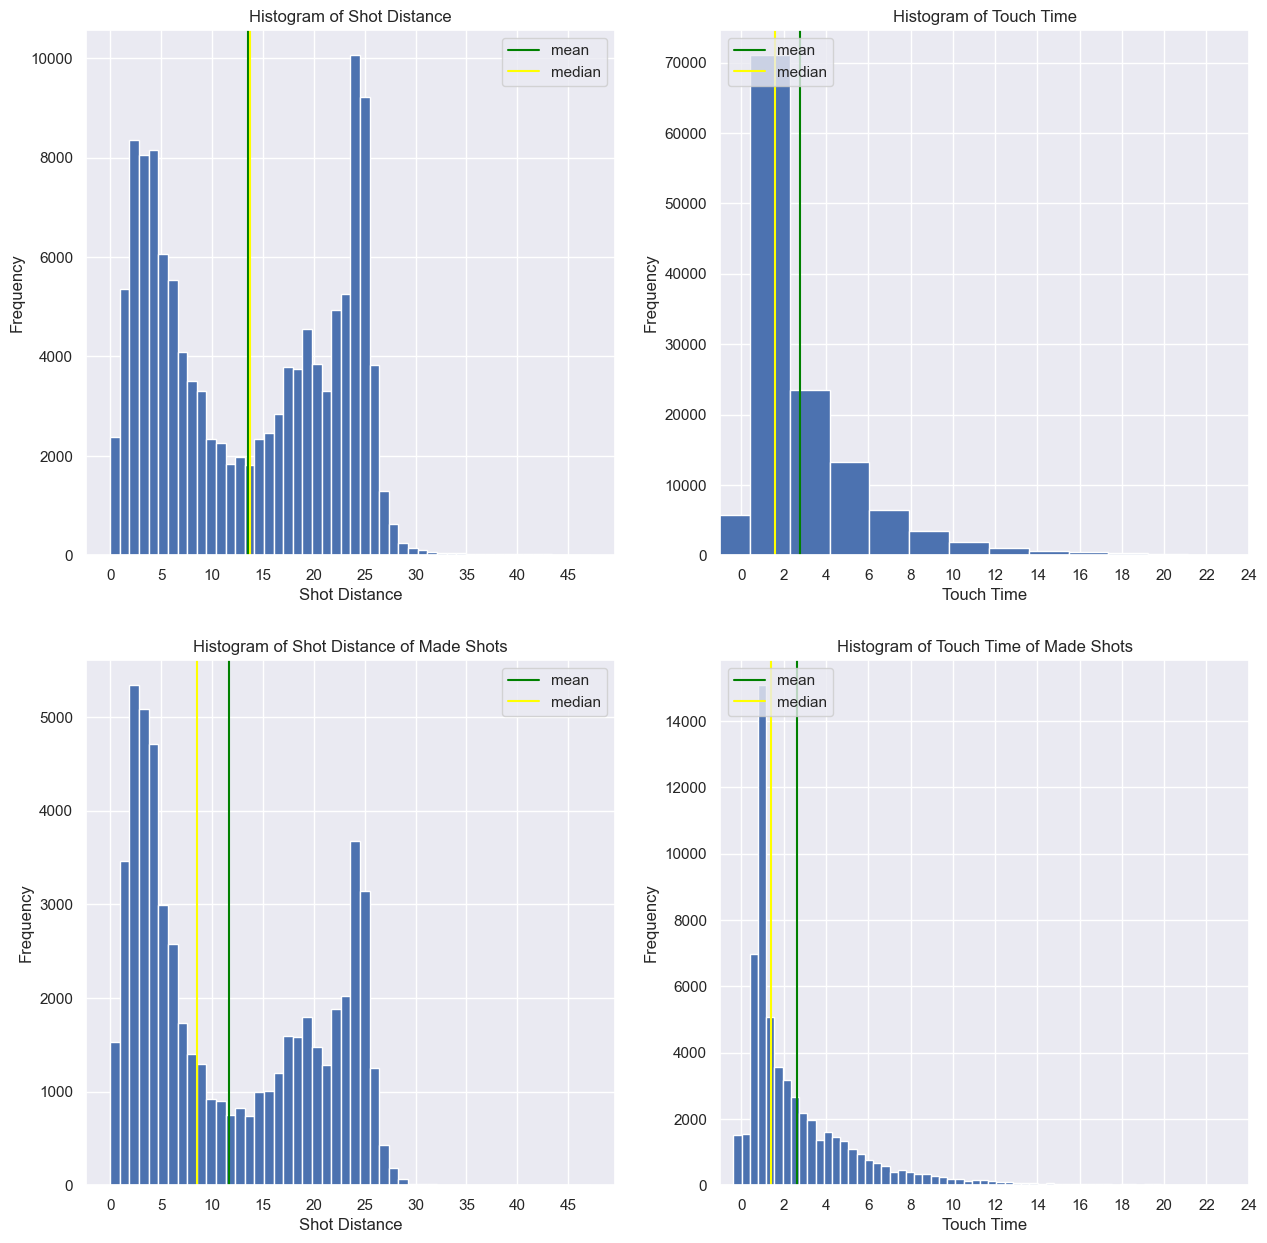

In [94]:
# shot disctance
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].hist(data.SHOT_DIST, bins=50)

axes[0, 0].axvline(data.SHOT_DIST.mean(), color = 'green', label = "mean")
axes[0, 0].axvline(data.SHOT_DIST.median(), color = 'yellow', label = "median")

axes[0, 0].set_title('Histogram of Shot Distance')
axes[0, 0].set_xlabel('Shot Distance')
axes[0, 0].locator_params(axis='x', nbins=20)
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend(loc='upper right')

# shot clock
axes[0, 1].hist(data.TOUCH_TIME, bins=100)

axes[0, 1].axvline(data.TOUCH_TIME.mean(), color = 'green', label = "mean")
axes[0, 1].axvline(data.TOUCH_TIME.median(), color = 'yellow', label = "median")

axes[0, 1].set_title('Histogram of Touch Time')
axes[0, 1].set_xlabel('Touch Time')
axes[0, 1].locator_params(axis='x', nbins=24)
axes[0, 1].set_xlim(-1, 24)
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend(loc='upper left')

# shot disctance of made shots
axes[1, 0].hist(data[data['SHOT_RESULT_made'] == 1].SHOT_DIST, bins=50)

axes[1, 0].axvline(data[data['SHOT_RESULT_made'] == 1].SHOT_DIST.mean(), color = 'green', label = "mean")
axes[1, 0].axvline(data[data['SHOT_RESULT_made'] == 1].SHOT_DIST.median(), color = 'yellow', label = "median")

axes[1, 0].set_title('Histogram of Shot Distance of Made Shots')
axes[1, 0].set_xlabel('Shot Distance')
axes[1, 0].locator_params(axis='x', nbins=20)
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(loc='upper right')

# shot clock of made shots
axes[1, 1].hist(data[data['SHOT_RESULT_made'] == 1].TOUCH_TIME, bins=100)

axes[1, 1].axvline(data[data['SHOT_RESULT_made'] == 1].TOUCH_TIME.mean(), color = 'green', label = "mean")
axes[1, 1].axvline(data[data['SHOT_RESULT_made'] == 1].TOUCH_TIME.median(), color = 'yellow', label = "median")

axes[1, 1].set_title('Histogram of Touch Time of Made Shots')
axes[1, 1].set_xlabel('Touch Time')
axes[1, 1].locator_params(axis='x', nbins=24)
axes[1, 1].set_xlim(-1, 24)
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(loc='upper left')


In this 4 histograms we can see the relation of all the shots with the made shots.
We can see that the main shots of NBA are at 5 feet and 25 feet. 25 feet is the 3 point line and the nearest you are, the more probability you have to score.
According to how much time should you have the ball, we can see that the most common time is 0 seconds. For more probability, you should shoot as soon as you get the ball.

Shots made by period

Text(0.5, 1.0, 'Percentage of Shots Made in Overtime')

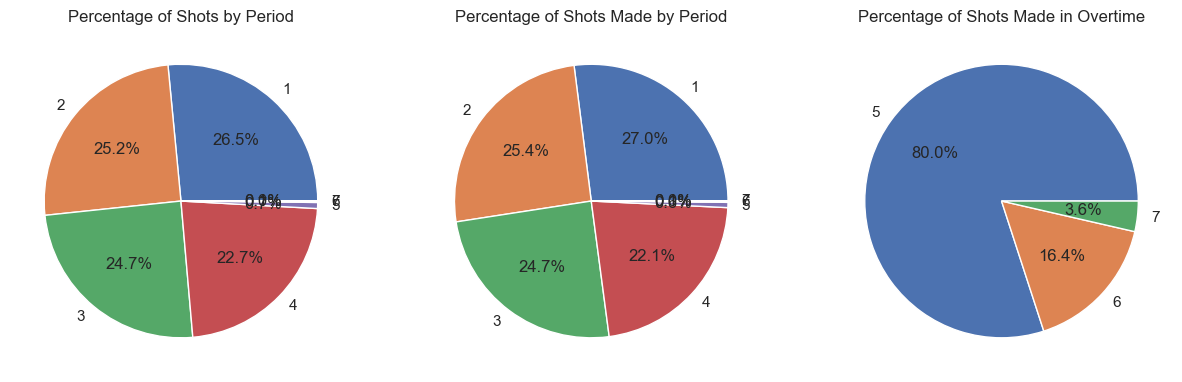

In [95]:
# Shots by period
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

count_per_title = data.PERIOD.value_counts()
percent = (count_per_title/len(data))*100

title_name = data.groupby('PERIOD').count().index.values

axes[0].pie(percent, labels=title_name, autopct='%1.1f%%')
axes[0].set_title('Percentage of Shots by Period')

# Shots made by period
count_per_title = data[data['SHOT_RESULT_made'] == 1].PERIOD.value_counts()
percent = (count_per_title/len(data[data['SHOT_RESULT_made'] == 1]))*100

title_name = data[data['SHOT_RESULT_made'] == 1].groupby('PERIOD').count().index.values

axes[1].pie(percent, labels=title_name, autopct='%1.1f%%')
axes[1].set_title('Percentage of Shots Made by Period')

# Shots made in overtime
title_name = data[data['SHOT_RESULT_made'] == 1]

count_per_title = title_name[title_name['PERIOD'] > 4].PERIOD.value_counts()
percent = (count_per_title/len(title_name[title_name['PERIOD'] > 4]))*100

title_name = title_name[title_name['PERIOD'] > 4].groupby('PERIOD').count().index.values

axes[2].pie(percent, labels=title_name, autopct='%1.1f%%')
axes[2].set_title('Percentage of Shots Made in Overtime')


In this graph we can see the shots made by period. We can see that the most common period is the first period. The 4th period is the last one and the players are more tired, so they have less probability to score.
The period 5 to 7 are the overtime periods. We have less data about this periods because they are not so common.

In the next graph we can see the percentage of shots

C:\Users\Francisco\AppData\Local\Temp\ipykernel_680\1010258381.py:72: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  threeShootsFarDefData = data[data['PTS_TYPE'] == 3][data['CLOSE_DEF_DIST'] > 3]
C:\Users\Francisco\AppData\Local\Temp\ipykernel_680\1010258381.py:73: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  threeShootsDataCloseDef = data[data['PTS_TYPE'] == 3][data['CLOSE_DEF_DIST'] <= 3]


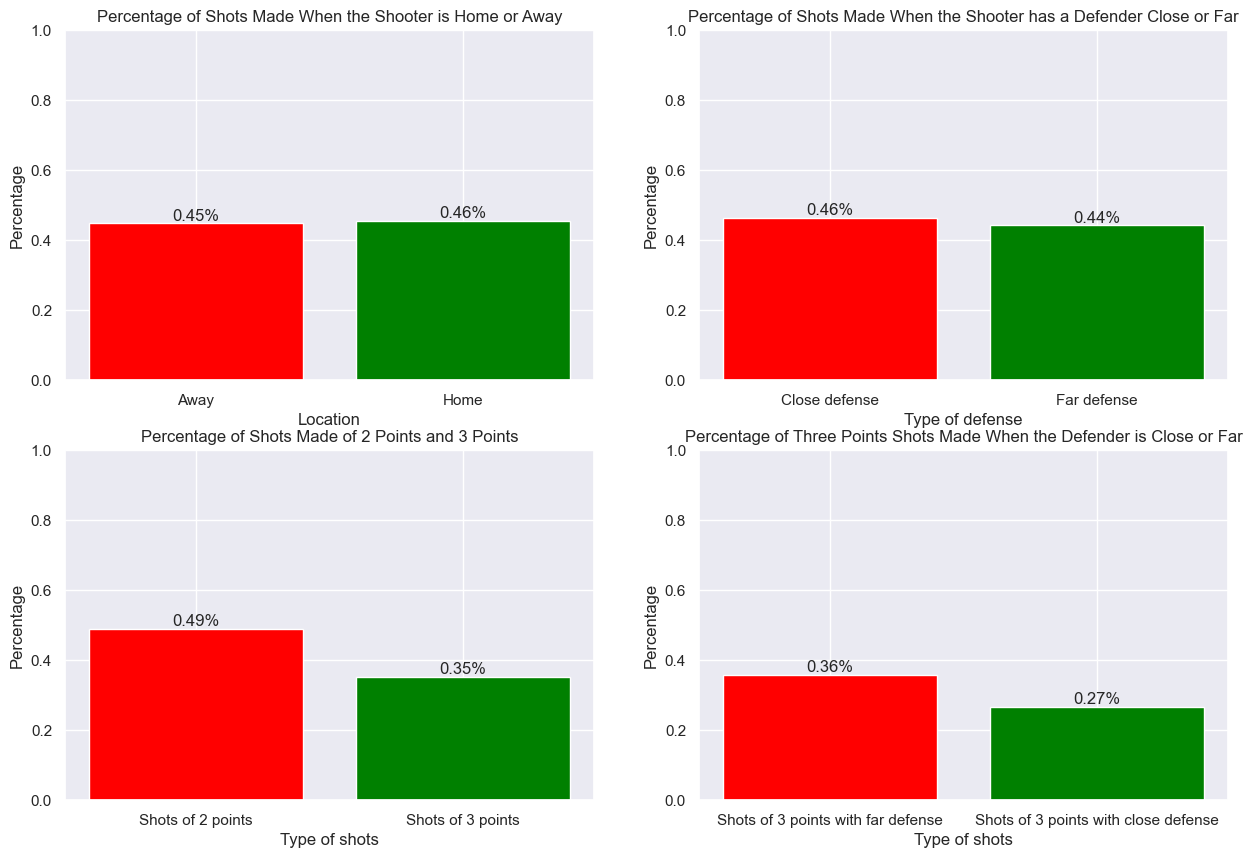

In [96]:
# Percentage of shots made when the shooter is home or away
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
homeData = data[data['LOCATION_H'] == 1]
awayData = data[data['LOCATION_A'] == 1]

percentHome = homeData.SHOT_RESULT_made.value_counts()
percentHome = (percentHome/len(homeData))

percentAway = awayData.SHOT_RESULT_made.value_counts()
percentAway = (percentAway/len(awayData))

title_name = ['Away', 'Home']
percentages = [percentAway.values[1], percentHome.values[1]]

bars = axes[0, 0].bar(title_name, percentages, color=['red', 'green'])
axes[0, 0].set_title('Percentage of Shots Made When the Shooter is Home or Away')
axes[0, 0].set_xlabel('Location')
axes[0, 0].set_ylabel('Percentage')
axes[0, 0].set_ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Percentage of shots made when the shooter has a defender close or far
farDefData = data[data['CLOSE_DEF_DIST'] > 3.5]
closeDefData = data[data['CLOSE_DEF_DIST'] <= 3.5]

percentFarDef = farDefData.SHOT_RESULT_made.value_counts()
percentFarDef = (percentFarDef/len(farDefData))

percentCloseDef = closeDefData.SHOT_RESULT_made.value_counts()
percentCloseDef = (percentCloseDef/len(closeDefData))

title_name = ['Close defense', 'Far defense']
percentages = [percentCloseDef.values[1], percentFarDef.values[1]]

bars = axes[0, 1].bar(title_name, percentages, color=['red', 'green'])
axes[0, 1].set_title('Percentage of Shots Made When the Shooter has a Defender Close or Far')
axes[0, 1].set_xlabel('Type of defense')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].set_ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Percentage of shots made of 2 points and 3 points
threeShootsData = data[data['PTS_TYPE'] == 3]
twoShootsData = data[data['PTS_TYPE'] == 2]

percentThreeShoots = threeShootsData.SHOT_RESULT_made.value_counts()
percentThreeShoots = (percentThreeShoots/len(threeShootsData))

percentTwoShoots = twoShootsData.SHOT_RESULT_made.value_counts()
percentTwoShoots = (percentTwoShoots/len(twoShootsData))

title_name = ['Shots of 2 points', 'Shots of 3 points']
percentages = [percentTwoShoots.values[1], percentThreeShoots.values[1]]

bars = axes[1, 0].bar(title_name, percentages, color=['red', 'green'])
axes[1, 0].set_title('Percentage of Shots Made of 2 Points and 3 Points')
axes[1, 0].set_xlabel('Type of shots')
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].set_ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Percentage of three points shots made when the defender is close or far
threeShootsFarDefData = data[data['PTS_TYPE'] == 3][data['CLOSE_DEF_DIST'] > 3]
threeShootsDataCloseDef = data[data['PTS_TYPE'] == 3][data['CLOSE_DEF_DIST'] <= 3]

percentThreeShootsFarDef = threeShootsFarDefData.SHOT_RESULT_made.value_counts()
percentThreeShootsFarDef = (percentThreeShootsFarDef/len(threeShootsFarDefData))

percentThreeShootsCloseDef = threeShootsDataCloseDef.SHOT_RESULT_made.value_counts()
percentThreeShootsCloseDef = (percentThreeShootsCloseDef/len(threeShootsDataCloseDef))

title_name = ['Shots of 3 points with far defense', 'Shots of 3 points with close defense']
percentages = [percentThreeShootsFarDef.values[1], percentThreeShootsCloseDef.values[1]]

bars = axes[1, 1].bar(title_name, percentages, color=['red', 'green'])
axes[1, 1].set_title('Percentage of Three Points Shots Made When the Defender is Close or Far')
axes[1, 1].set_xlabel('Type of shots')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].set_ylim(0, 1)

for bar in bars:
    yval = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')


We can see that is not relevant if you are home or away. The percentage is almost the same.
The perecentage of shots when the defender is near or lower is not significant because it takes into account the layups and dunks. The graph that filters the threes is more significant. Players have more probability to score when the defender is far.
Finally, three point shots have less probability to score than two point shots.

Now we are going to see the correlation between the columns

In [97]:
# First of all we have to drop the numerical features that we don't need
numericData = data.drop(['GAME_ID','MATCHUP', 'CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID', 'player_name', 'player_id'], axis=1)
numericData.head()

,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,FGM,PTS,LOCATION_A,LOCATION_H,W_L,W_W,SHOT_RESULT_made,SHOT_RESULT_missed
0,24,1,1,1.150000,2,1.9,7.7,2,1.3,1,2,1.0,0.0,0.0,1.0,1.0,0.0
1,24,2,1,0.233333,0,0.8,28.2,3,6.1,0,0,1.0,0.0,0.0,1.0,0.0,1.0
2,24,3,1,0.000000,3,2.7,10.1,2,0.9,0,0,1.0,0.0,0.0,1.0,0.0,1.0
3,24,4,2,11.783333,2,1.9,17.2,2,3.4,0,0,1.0,0.0,0.0,1.0,0.0,1.0
4,24,5,2,10.566667,2,2.7,3.7,2,1.1,0,0,1.0,0.0,0.0,1.0,0.0,1.0


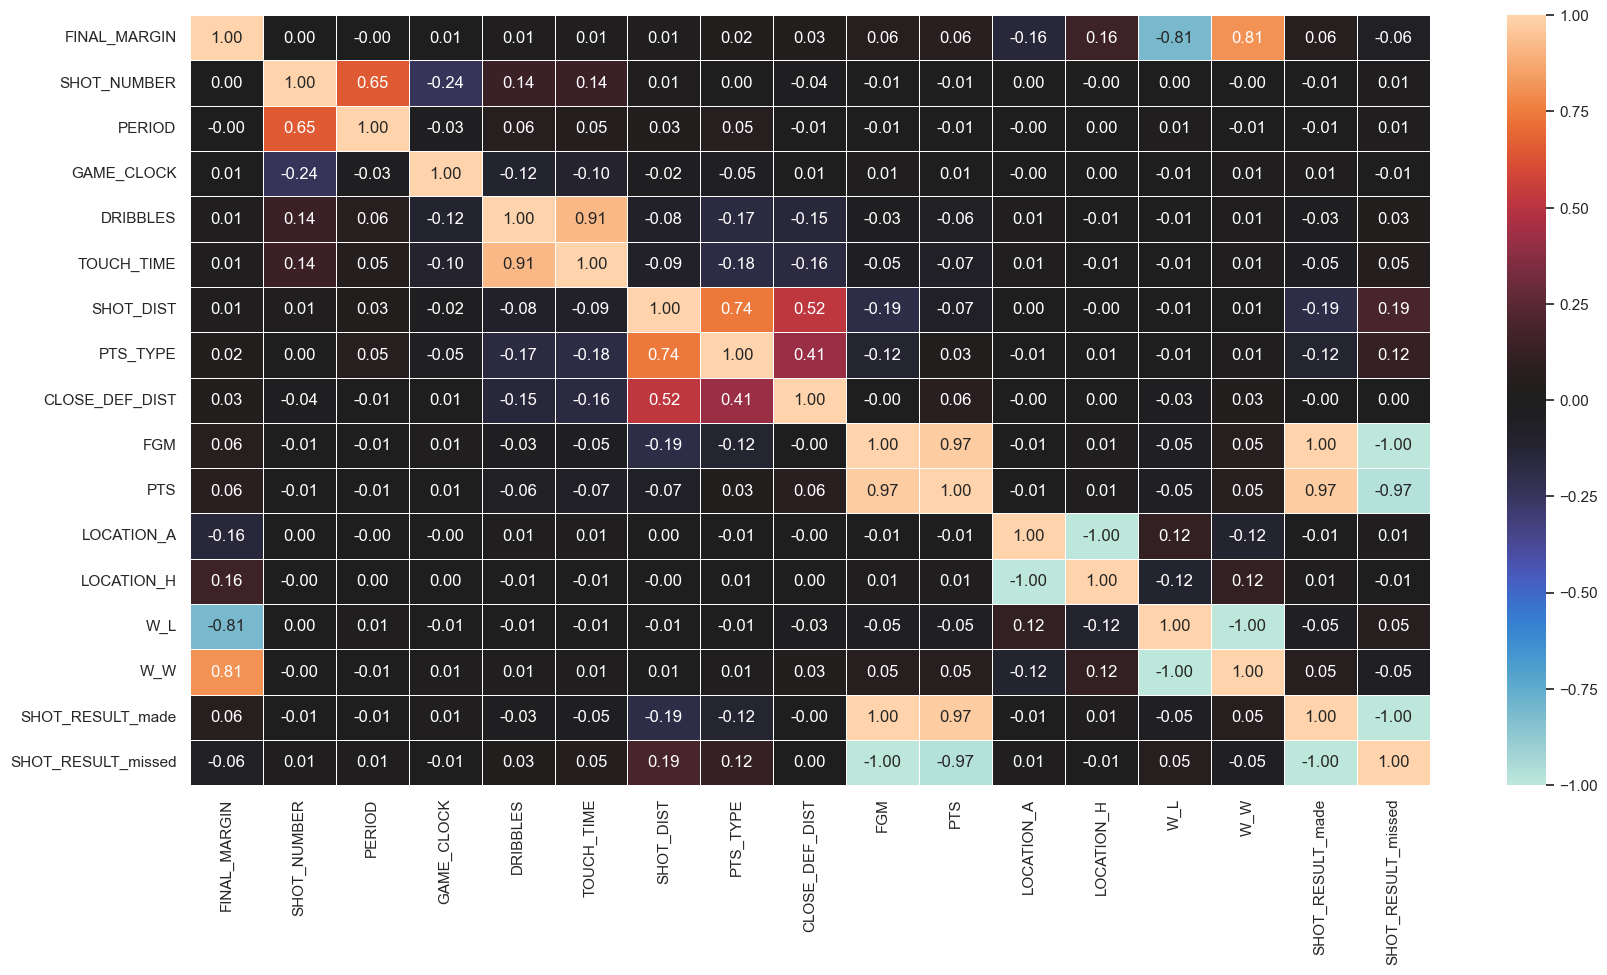

In [98]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(numericData.corr(),annot= True, fmt=".2f", cmap="icefire", linewidths=.5)
plt.show()